In [6]:
import numpy as np
import matplotlib.pyplot as plt
from funcs.utils import *

In [7]:
N = 10000
g = 0.6
eta_list = [-0.65, 0.65, -0.5, 0.5, 0]
phi = np.tanh
Tobs = 10000
Tinit = 1000
sigma = 0.1
sigma_n = 0

In [8]:
data = np.load("data/mcscaling_reciprocal.npy")
nums = data.shape[1]
max_leadout = data.shape[2]

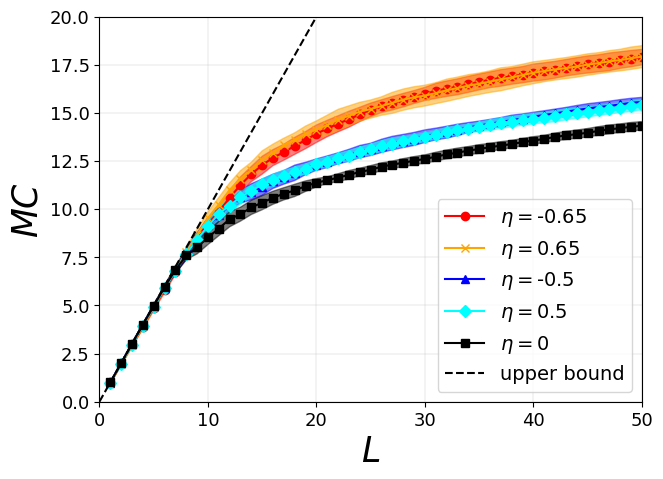

In [9]:
fig = plt.figure(figsize=(7,5))
markers =["o", "x", "^", "D", "s"]
colors = ["red", "orange", "blue", "cyan", "k"]

for ideta, eta in enumerate(eta_list):
    mcs_mean = np.mean(data[ideta,:,:], axis=0)
    mcs_std = np.std(data[ideta,:,:], axis=0)
    plt.plot(np.arange(1,max_leadout+1), mcs_mean, markersize=6, marker=markers[ideta], label=r"$\eta=$"+f"{eta}", color=colors[ideta])
    plt.fill_between(np.arange(1,max_leadout+1),mcs_mean-mcs_std, mcs_mean+mcs_std, alpha=0.5, color=colors[ideta])
plt.plot(np.arange(0,max_leadout+1),np.arange(0,max_leadout+1),linestyle="--",color="k", label="upper bound")
plt.xlabel(r"$L$",fontsize=25)
plt.ylabel(r"$MC$",fontsize=25)
plt.tick_params(labelsize=13)
plt.xlim(0,50)
plt.ylim(0,20)
plt.legend(fontsize=14)
#plt.title(f"Correlated, N={N}, g={g}, T={Tobs}, sigma={sigma}, sigma_n={sigma_n}")
plt.grid(linewidth=0.2)
plt.show()

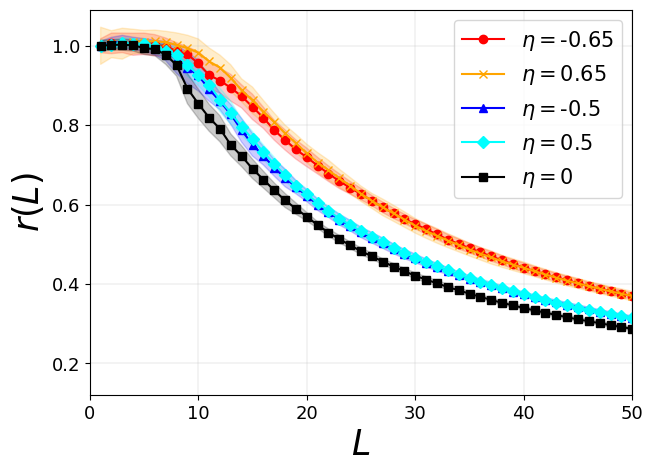

In [10]:
fig = plt.figure(figsize=(7,5))

for ideta, eta in enumerate(eta_list):
    mcs = data[ideta,:,:]
    div = np.mean(mcs[:,0],axis=0)*np.ones([nums,1])@(np.arange(1,max_leadout+1).reshape(1,-1))
    ratios = mcs/div
    mean_ratios = np.mean(ratios, axis=0)
    std_ratios = np.std(ratios, axis=0)
    plt.plot(np.arange(1,max_leadout+1), mean_ratios, markersize=6, marker=markers[ideta], label=r"$\eta=$"+f"{eta}", color=colors[ideta])
    plt.fill_between(np.arange(1,max_leadout+1), mean_ratios+std_ratios, mean_ratios-std_ratios, alpha=0.2, color=colors[ideta])

plt.xlabel(r"$L$",fontsize=25)
plt.ylabel(r"$r(L)$",fontsize=25)
plt.tick_params(labelsize=13)
#plt.ylim(0,1.2)
plt.xlim(0, 50)
plt.legend(fontsize=15)
#plt.title(f"Correlated, N={N}, g={g}, T={Tobs}, sigma={sigma}, sigma_n={sigma_n}")
plt.grid(linewidth=0.2)
plt.show()